# 1. 문제정의
- 비만도를 예측하는 인공지능을 만들어보자
- 처음에는 비교적 간단하게 문제를 정의하고, 데이터를 수집한 후에 자세하게 정의

# 2. 데이터 수집
- 파일 다운로드(bmi_500.csv)
- 500명의 키, 몸무게, 성별, 비만도 라벨 데이터

In [8]:
import pandas as pd
data = pd.read_csv('data/bmi_500.csv')
data.head()
# Label : Obesity = 비만

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


# 3. 데이터 전처리
- 결측치, 이상치 처리
- 문제 데이터는 학습하려면 수치 데이터로 변환 > 타입이 int, float

In [12]:
# 결측치 확인하기
# Non-Null Count 결측치가 아닌 데이터의 수
# object는 변환 필요
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [17]:
# 이상치 확인하기
# 수치 데이터의 통계값 출력
# 1. 데이터의 전체 분포 > 특정 범위에 몰려있지 않은지 확인! > 
#                                       >min~max 사이에 있는 값들의 차이가 일정한가?
#                                       > 일정하다 : 데이터의 분포가 고르다
#                                       > 일정하지 않다 : 특정범위에 데이터가 몰려있다
# 2. 이상치 확인하기 > min, max 값 확인하기
data.describe()
# -> min~max에서 값의 분포 확인가능
# 값의 차이가 일정하다 = 값이 다르게 분포되어 있다
# 다른 값보다 50%~75%의 차이가 적다 

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 4. 탐색적 데이터 분석
- 데이터 자세하게 보자
- 그래프를 통한 시각화

## 비만도 등급별로 시각화
- 등급별로 데이터 이상치는 없는지 확인하기

In [26]:
data['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

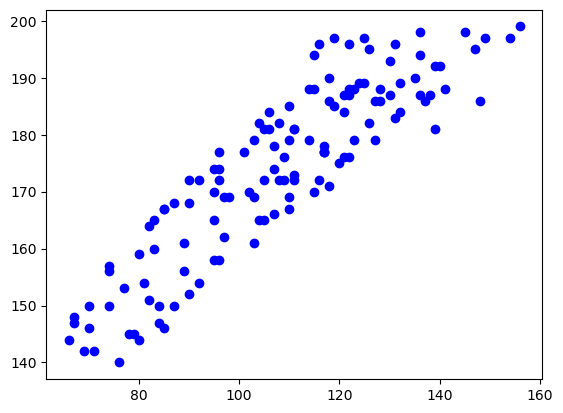

In [67]:
# Obesity 시각화 하기
import matplotlib.pyplot as plt
# 1. 전체 데이터에서 Label의 값이 Obesity인 값들만 가져오기 > 불리언 인덱싱
#ob = data[data['Label']=='Obesity']
# 1.1 Label 의 값이 Obesity면 True 아니면 False
bol = data['Label'] == 'Obesity'
# 1.2 불리언 데이터를 인덱싱으로 사용 > True는 출력, False는 출력 X
bol_data = data.loc[bol]
plt.scatter(bol_data['Weight'],bol_data['Height'], c = 'blue')

## 6개 비만도 한 번에 시각화 하기

In [92]:
# 'Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak', 'Extremely Weak'
def myscatter(label, color):
    bol = data['Label'] == label
    bol_data = data.loc[bol]
    plt.scatter(bol_data['Weight'],bol_data['Height'], c = color, label=label)

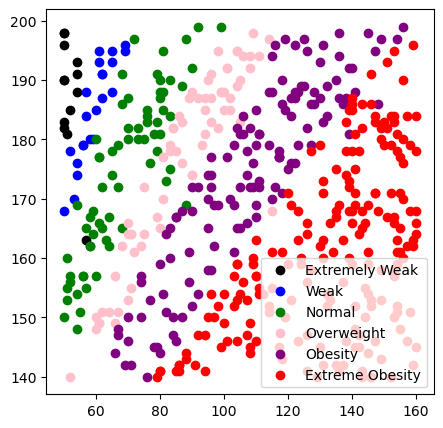

In [94]:
plt.figure(figsize=(5,5)) # 가로, 세로 크기
myscatter('Extremely Weak','black')
myscatter('Weak','blue')
myscatter('Normal','green')
myscatter('Overweight','pink')
myscatter('Obesity','purple')
myscatter('Extreme Obesity','red')
plt.legend() #label 표시하기
plt.show()

In [104]:
data.loc[(data['Label'] == 'Normal') & (data['Weight']==78)]

,Gender,Height,Weight,Label
165,Male,181,78,Normal


In [102]:
#따지고 보면 데이터 전처리
# 3단계와 4단계는 같이 진행되는 편
data.loc[231,'Label'] = 'obesity'
data.loc[231,'Label']

'obesity'

In [ ]:
# 머신러닝 7단계 중 보통 4단계 까지의 소요시간이 보통 70%

# 5. 모델 선택 및 하이퍼 파라미터 조정
- 머신러닝 모델이 하는 역할
- 머신러닝 모델마다 모델의 분석방법 있다.
- 데이터를 잘 보고 어울리는 모델 찾아서 모델 세부조정하기.
- 데이터 처리한 후 여러 모델로 결과를 출력하고 제일 좋은 모델 선택.
- 가장 좋은모델 = score가 1에 가까운 모델
- 모델 다 사용해보고 score 가 높은 모델 쓰기

## 데이터 분리하기
- 문제와 정답으로 분리
- train과 test로 분리

In [113]:
#문제와 정답으로 분리
data
# Height, Weight 를 문제데이터로
X = data.loc[: , 'Height':'Weight']
# Label을 정답 데이터로
y = data.loc[: , 'Label']

In [121]:
# 훈련(train) 데이터와 평가(test) 데이터로 분리
# 전체 데이터 = 100, 훈련 데이터 = 70, 평가 데이터 = 30
#              500               350              150
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

## 모델 선택
- KNN모델 사용

In [195]:
from sklearn.neighbors import KNeighborsClassifier
# 모델 세부 조정 = 하이퍼 파라미터 튜닝 : n_neighbors = 7
# 1. 이웃의 숫자 : n_neighbors
# 2. 거리 계산 방식 : p : 1 = 멘하튼, 2 = 유클리디언
# 3. 이웃의 중요도 방식 : weight(가중치 = 중요도) : uniform = 이웃이면 동등하다
#                                               : distance = 가깔울수록 중요하다
knn = KNeighborsClassifier(n_neighbors = 10, p = 2, weights = 'uniform')

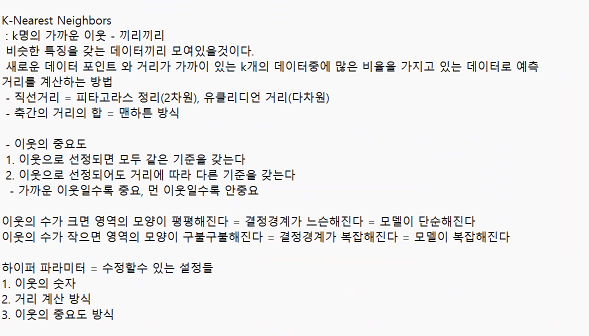

## K-Nearest Neighbors
 : k명의 가까운 이웃 - 끼리끼리
 비슷한 특징을 갖는 데이터끼리 모여있을것이다.
 새로운 데이터 포인트 와 거리가 가까이 있는 k개의 데이터중에 많은 비율을 가지고 있는 데이터로 예측
거리를 계산하는 방법
 - 직선거리 = 피타고라스 정리(2차원), 유클리디언 거리(다차원)
 - 축간의 거리의 합 = 맨하튼 방식

 - 이웃의 중요도
 1. 이웃으로 선정되면 모두 같은 기준을 갖는다
 2. 이웃으로 선정되어도 거리에 따라 다른 기준을 갖는다
  - 가까운 이웃일수록 중요, 먼 이웃일수록 안중요

이웃의 수가 크면 영역의 모양이 평평해진다 = 결정경계가 느슨해진다 = 모델이 단순해진다
이웃의 수가 작으면 영역의 모양이 구불구불해진다 = 결정경계가 복잡해진다 = 모델이 복잡해진다

하이퍼 파라미터 = 수정할수 있는 설정들
1. 이웃의 숫자
2. 거리 계산 방식
3. 이웃의 중요도 방식


score : 값이 1에 가까울 수록 잘 만들어진 규칙이다.
* 훈련 데이터로 출력한 점수 train score : 규칙이 얼마나 복잡한가?
* 평가 데이터로 출력한 점수 test score : 새로운 데이터를 잘 맞추는가?
- 규칙은 train데이터를 기반으로 만들어진다

1. train score : 0.9, test score : 0.7
 - 학습을 너무 복잡하게 시키면 / 많이 시키면 발생하는 현상
 - 설계된 규칙이 train 데이터만 잘 맞추는 규칙을 생성 / test데이터는 못맞추는 복잡한 규칙
 - 규칙이 훈련 데이터에만 복잡해서 새로운 데이터를 잘 못맞춘다
* 과대적합 : 규칙이 훈련 데이터만 맞추게 복잡하게 만들어졌다.
 - train score는 높게 나옴, test score는 낮게 나옴
 - 규칙을 더 단순하게 만들어야한다 = train이 아닌 test도 잘 맞추는 규칙이 되어야 한다

2. train score : 0.85, test score : 0.85
 - 1번 상황보다 학습을 덜 시켰다 > 규칙이 조금 더 단순해서 train은 못맞춤
 - 규칙이 단순해서 test(새로운 데이터)는 더 잘맞춤 = 일반화가 잘된 모델
* 일반화 : 규칙이 적당히 만들어졌다, 이상적인 상황
 - train score는 과대적합보다 낮게나옴, test score는 높게 나옴

3. train score : 0.7, test score : 0.6
 - 학습이 조금만 되어서 규칙이 조금만 생성
 - train, test에서 점수가 낮게 나옴 = 과소적합
* 과소적합 : 규칙이 조금만 생성되어서 모델의 성능이 낮게 나옴

여러 결과를 비교해봐야 과대적합 / 과소적합 / 일반화를 구분 할 수 있음
 - 비교를 해봐야지만 규칙의 복잡성을 판단할 수 있다.

 - 과대적합 : 규칙이 복잡, train 점수 높음, test 점수 중간
 - 과소적합 : 규칙이 단순, train 점수 낮음, test 점수 낮음
 - 일반화 : 규칙이 적당, train 점수 중간, test 점수 높음 👍

# 6.학습
- 준비된 데이터로 머신러닝 모델이 규칙 찾게하기
- train 데이터로 학습하기

In [198]:
# 머신러닝 모델이 규칙 찾기 완성
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# 7. 평가 및 예측
- 평가 : 머신러닝 모델이 잘 만들어졌는지 확인해 보기
- 예측 : 설계된 규칙으로 새로운 문제의 정답 추론해보기

In [201]:
# 분류의 평가지표 : 정확도
# 정확도 : 전체중에 맞춘 비율
knn.score(X_test, y_test)
# X_test를 사용해서 정답을 추론해보고 = 예측값
# 예측값과 y_test를 비교
# 0.9 = 예측값에서 90%가 정답이었다.앞으로 들어 올 문제중 90%는 맞출 수 있다

0.94

In [203]:
# train 데이터를 사용해서 평가하면 모델의 성능보다
# 정확도가 높게 나옴
knn.score(X_train, y_train)

0.9085714285714286

In [176]:
# 예측
# 학습할때의 형식과 동일하게 값을 적어야 함!
knn.predict(pd.DataFrame([[174,70],[180,85]],columns=['Height','Weight']))
# knn.predict([[174,70],[180,85]])

array(['Normal', 'Overweight'], dtype=object)

In [178]:
X_train.head()

,Height,Weight
0,174,96
1,189,87
2,185,110
3,195,104
4,149,61
